## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

 Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 0

If students address the detailed feedback in a future checkpoint they will earn these points back






|                                  | **Unsatisfactory**                                                                                                                                                                                                                                                                                                                        | **Developing**                                                                                                                                                                                                       | **Proficient**                                                                                                                                                                                            | **Excellent**                                                                                                                                                                            |
|----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **EDA relevance**                | EDA is mostly neither relevant to the question nor helpful in figuring out how to address the question. Or the EDA does address the question, but many obviously relevant variables / analyses / figures were not included. | EDA is partly irrelevant/unhelpful. EDA missed one or two obvioulsy relevant analysis (distributions of single variables or relationships between variables) | EDA includes the obviously relevant / helpful variables in addressing the question.                                                              | Thorough EDA fully explored the dataset                                                                                                                 |
| **EDA analysis and description** | Many of the analyses are poor choices (e.g., using means instead of medians for obviously skewed data), or are poorly described in the text, or do not aid understanding the data                                                                                                                                                     | Some of the analyses are poor choices, or are poorly described in the text, or do not aid understanding the data                                                                                                 | All analyses are correct choices. Only one or two have minor issues in the text descriptions supporting them. Mostly they fit well with other elements of the EDA and support understanding the data  | All analyses are correct choices with clear text descriptions supporting them. The figures fit well with the other elements of the EDA, producing a clear understanding of the data. |
| **EDA figures**                  | Many of the figures are poor plot choices (e.g., using a bar plot to represent a time series where it would be better to use a line plot) or have poor aesthetics (including colormap, data point shape/color, axis labels, titles, annotations, text legibility) or do not aid understanding the data                                | Some of the figures are poor plot choices or have poor aesthetics. Some figures do not aid understanding the data                                                                                                | All figures are correct plot choices. Only one or two have minor questionable aesthetic choices. The figures mostly fit well with the other elements of the EDA and support understanding the data    | All figures are correct plot choices with beautiful aesthetics. The figures fit well with the other elements of the EDA, producing a clear understanding of the data.                |





# COGS 108 - EDA Checkpoint

## Authors

Instructions: REPLACE the contents of this cell with your team list and their contributions. Note that this will change over the course of the checkpoints

This is a modified [CRediT taxonomy of contributions](https://credit.niso.org). For each group member please list how they contributed to this project using these terms:
> Analysis, Background research, Conceptualization, Data curation, Experimental investigation, Methodology, Project administration, Software, Visualization, Writing – original draft, Writing – review & editing

Example team list and credits:
- Alice Anderson: Conceptualization, Data curation, Methodology, Writing - original draft
- Bob Barker:  Analysis, Software, Visualization
- Charlie Chang: Project administration, Software, Writing - review & editing
- Dani Delgado: Analysis, Background research, Visualization, Writing - original draft

# Research Question

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback



## Background and Prior Work

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

# Hypothesis


Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Data

### Data overview

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your data checkpoint feedback


### Dataset #1 

Instructions: REPLACE the contents of this cell and the one below with your work, including any updates to recover points lost in your data checkpoint feedback

In [75]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

### Dataset #2
 as above, add any more copies of this that you need to given how many datasets you have

In [76]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

## Results

### Exploratory Data Analysis

Instructions: replace the words in this subsection with whatever words you need to setup and preview the EDA you're going to do.   

Please explicitly load the fully wrangled data you will use from `data/02-processed`.  This is a good idea rather than forcing people to re-run the data getting / wrangling cells above.  Sometimes it takes a long time to get / wrangle data compared to reloading the fixed up dataset.

Carry out whatever EDA you need to for your project in the code cells below.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

Please note that you should consider the use of python modules in your work.  Any code which gets called repeatedly should be modularized. So if you run the same pre-processing, analysis or visualiazation on different subsets of the data, then you should turn that into a function or class.  Put that function or class in a .py file that lives in `modules/`.  Import the module you made and use it to get your work done.  For reference see `get_raw()` which is inside `modules/get_data.py`. 



#### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [77]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

#### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [78]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

#### Section 3 of EDA
Blah blah blah.

In [79]:
# Insert some code here. Hello world!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_peak = pd.read_csv("data/02-processed/steamcharts_2018_2023_ok.csv")

In [80]:
def parse_tags(tag_str):
    if pd.isna(tag_str):
        return []
    return [t.strip().strip("'\'").lower() for t in tag_str.strip("[]").split(",")]

In [81]:
def load_tags(years=range(2018, 2024)):
    frame = pd.concat(
        [pd.read_csv(f"data/02-processed/{yr}_top250_final.csv")
                .assign(year=yr)[['appid', 'tags', 'year']] for yr in years], ignore_index=True)
    frame['tags'] = frame['tags'].apply(parse_tags)
    return frame

In [82]:
def explode_mode(df_tags):
    mode_map = {        
        'singleplayer': 'singleplayer',
        'single-player': 'singleplayer',
        'multiplayer': 'multiplayer',
        'multi-player': 'multiplayer',
        'co-op': 'co-op',
        'coop': 'co-op',
        'cooperative': 'co-op'
    }

    exploded = df_tags.explode('tags').rename(columns={'tags': 'mode_raw'})
    exploded['mode_raw'] = exploded['mode_raw'].str.lower().str.strip()
    exploded['mode'] = exploded['mode_raw'].map(mode_map)
    return exploded.dropna(subset=['mode'])

In [83]:
def assgin_period(year):
    if year <= 2019:
        return "18-19: Pre-Covid"
    elif year <= 2021:
        return "20-21: Covid"
    else:
        return "22-23: Post-Covid"

In [84]:
def monthly_proportions(df):
    monthly = df.groupby(['month_dt', 'mode'], as_index=False)['peak_players'].sum()
    monthly['proportion'] = monthly['peak_players'] / monthly.groupby('month_dt')['peak_players'].transform('sum')
    return monthly

In [85]:
def period_proportion(df):
    df = df.copy()
    df['period'] = df['year'].apply(assgin_period)
    cp = df.groupby(['appid', 'period', 'mode'], as_index=False)['peak_players'].mean()
    cp['proportion'] = cp['peak_players'] / cp.groupby(['appid', 'period'])['peak_players'].transform('sum')
    return cp

In [90]:
df_mode = explode_mode(load_tags())
df = df_peak.merge(df_mode[['appid', 'year', 'mode']], on=['appid', 'year'], how='inner')
df['month_dt'] = pd.to_datetime(df['month'])
df.head(20)

,year,rank,name,appid,month,avg_players,peak_players,status,mode,month_dt
0,2018,1,Bloons TD 6,960090,2018-12,465.62,688.0,ok,co-op,2018-12-01
1,2018,1,Bloons TD 6,960090,2018-12,465.62,688.0,ok,multiplayer,2018-12-01
2,2018,1,Bloons TD 6,960090,2018-12,465.62,688.0,ok,singleplayer,2018-12-01
3,2018,2,The Forest,242760,2018-01,5406.31,11300.0,ok,co-op,2018-01-01
4,2018,2,The Forest,242760,2018-01,5406.31,11300.0,ok,multiplayer,2018-01-01
5,2018,2,The Forest,242760,2018-01,5406.31,11300.0,ok,singleplayer,2018-01-01
6,2018,2,The Forest,242760,2018-02,5169.69,11253.0,ok,co-op,2018-02-01
7,2018,2,The Forest,242760,2018-02,5169.69,11253.0,ok,multiplayer,2018-02-01
8,2018,2,The Forest,242760,2018-02,5169.69,11253.0,ok,singleplayer,2018-02-01
9,2018,2,The Forest,242760,2018-03,4018.40,7626.0,ok,co-op,2018-03-01


Text(0, 0.5, 'Proportion of Peak Concurrent Players')

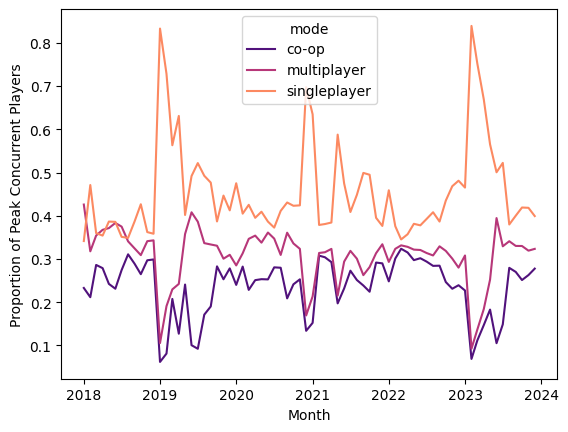

In [87]:
monthly_prop = monthly_proportions(df)

g1 = sns.lineplot(data=monthly_prop, x='month_dt', y='proportion', hue='mode', palette='magma')
plt.xlabel("Month")
plt.ylabel("Proportion of Peak Concurrent Players")

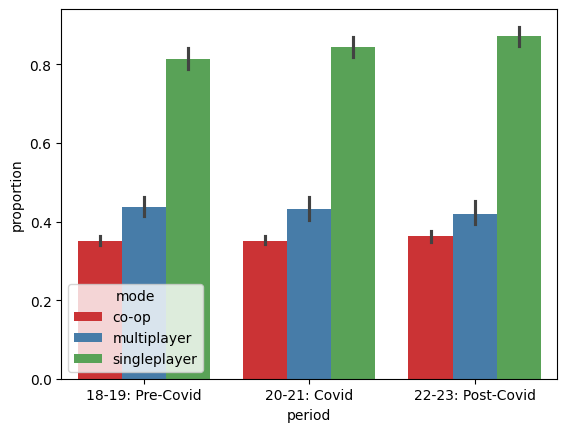

In [88]:
period_prop = period_proportion(df)
order = ["18-19: Pre-Covid", "20-21: Covid", "22-23: Post-Covid"]
g2 = sns.barplot(data=period_prop, x='period', y='proportion', hue='mode', order=order, palette='Set1')

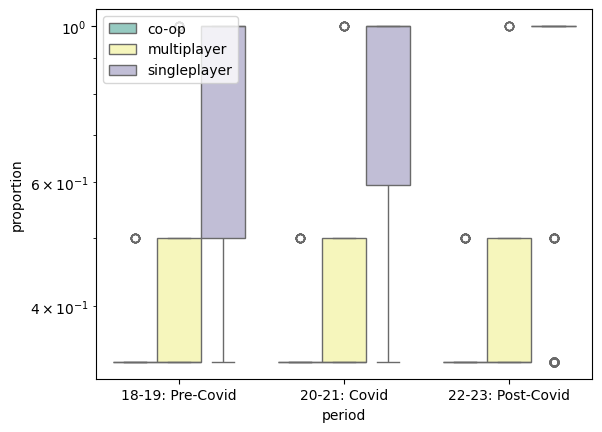

In [89]:
g3 = sns.boxplot(data=period_prop, x='period', y='proportion', hue='mode', order=order, palette='Set3', log_scale=True)
g3.legend(loc='upper left')

## Ethics

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Team Expectations 

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Project Timeline Proposal

Instructions: Replace this with your timeline.  **PLEASE UPDATE your Timeline!** No battle plan survives contact with the enemy, so make sure we understand how your plans have changed.  Also if you have lost points on the previous checkpoint fix them